<a href="https://colab.research.google.com/github/shkshreyas/Student_Placement/blob/master/Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv("/content/placement-dataset.csv") #https://www.kaggle.com/datasets/sameerprogrammer/college-placement

In [60]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [61]:
df = df.iloc[:,1:]

In [62]:
df.dropna(inplace=True)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [63]:
df.shape

(100, 3)

In [64]:
import matplotlib.pyplot as plt

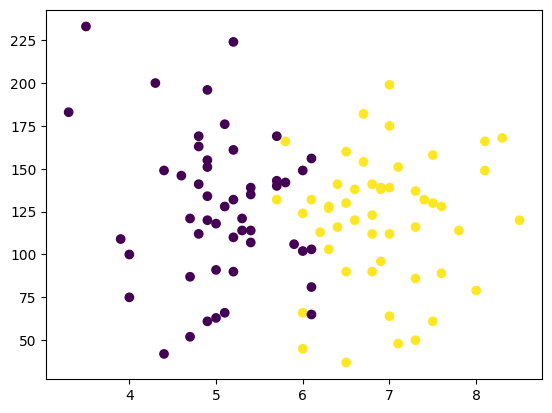

In [65]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [66]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [70]:
Y_pred = model.predict(X_test)

In [71]:
Y_test

25    0
12    0
51    0
94    0
88    0
5     1
61    1
0     1
82    1
84    0
Name: placement, dtype: int64

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(Y_test,Y_pred)

1.0

In [74]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

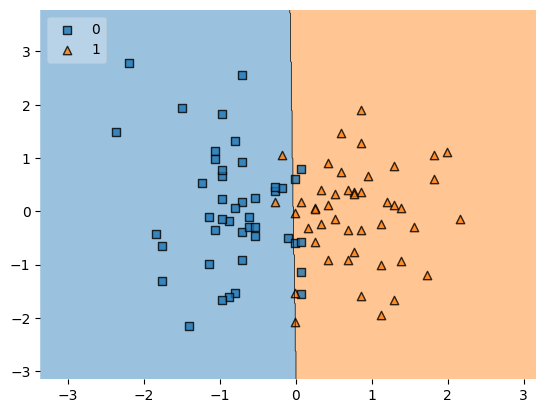

In [75]:
plot_decision_regions(X_train,Y_train.values, clf=model, legend=2)

In [76]:
import pickle

In [77]:
pickle.dump(model,open('model.pkl','wb'))